In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df=pd.read_csv('C:\\Users\\GNANASEKARAN\\Documents\\used_device_data.csv')

In [4]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
data=pd.read_csv('C:\\Users\\GNANASEKARAN\\Documents\\used_device_data.csv')

In [6]:
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [7]:
data.shape

(3454, 15)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [9]:
data.describe()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


In [10]:
data.duplicated().sum()

0

In [11]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [12]:
df = data.copy()

In [15]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [19]:
df['normalized_used_price'].describe()

count    3454.000000
mean        4.364712
std         0.588914
min         1.536867
25%         4.033931
50%         4.405133
75%         4.755700
max         6.619433
Name: normalized_used_price, dtype: float64

C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


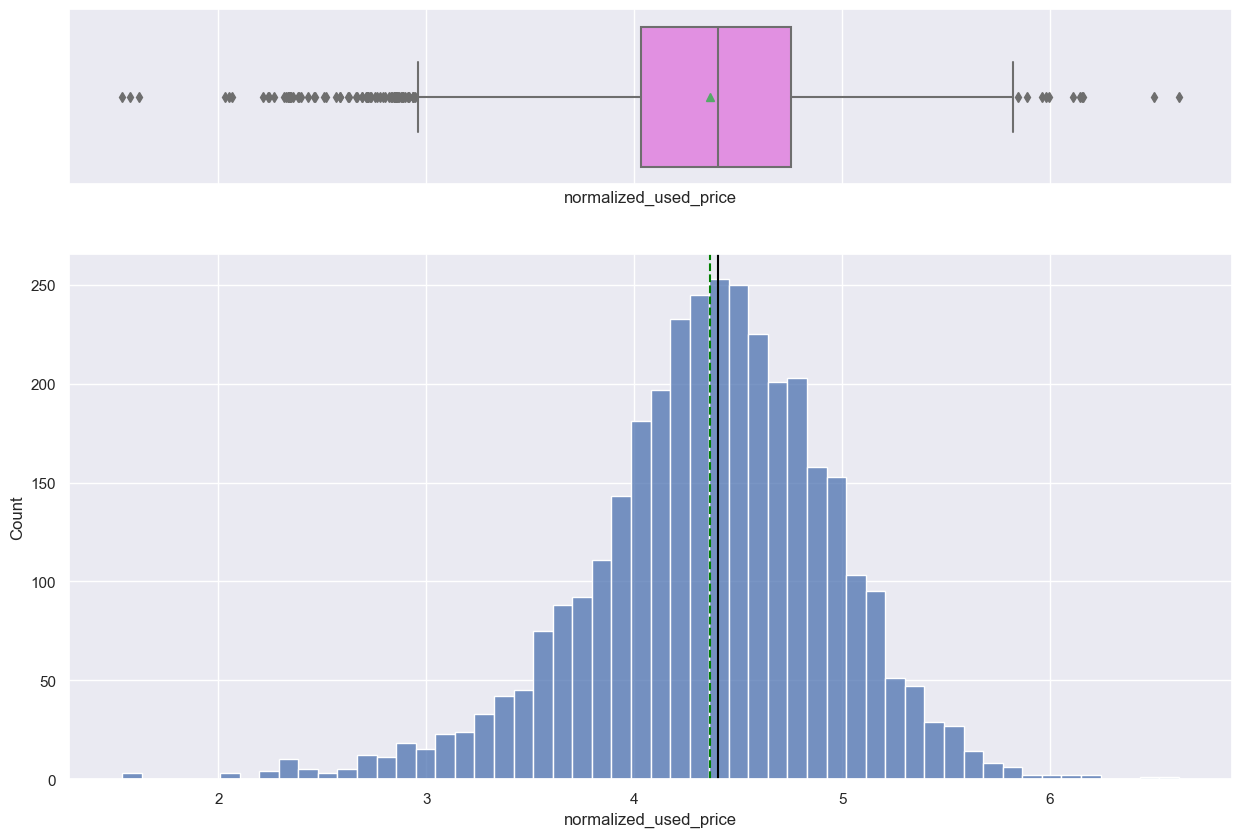

In [17]:
histogram_boxplot(df, "normalized_used_price")

In [20]:
df['normalized_new_price'].describe()

count    3454.000000
mean        5.233107
std         0.683637
min         2.901422
25%         4.790342
50%         5.245892
75%         5.673718
max         7.847841
Name: normalized_new_price, dtype: float64

C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


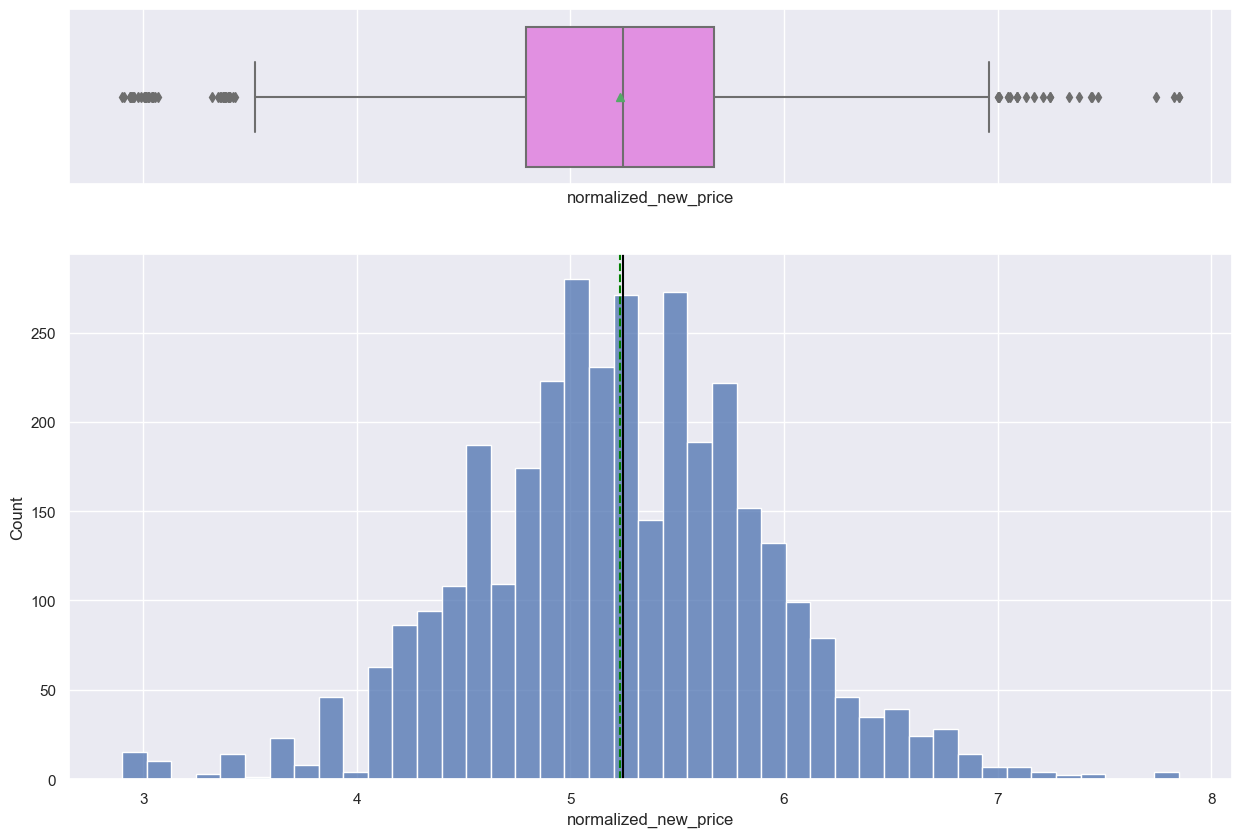

In [18]:
histogram_boxplot(df, 'normalized_new_price')

In [21]:
df['screen_size'].describe()

count    3454.000000
mean       13.713115
std         3.805280
min         5.080000
25%        12.700000
50%        12.830000
75%        15.340000
max        30.710000
Name: screen_size, dtype: float64

C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


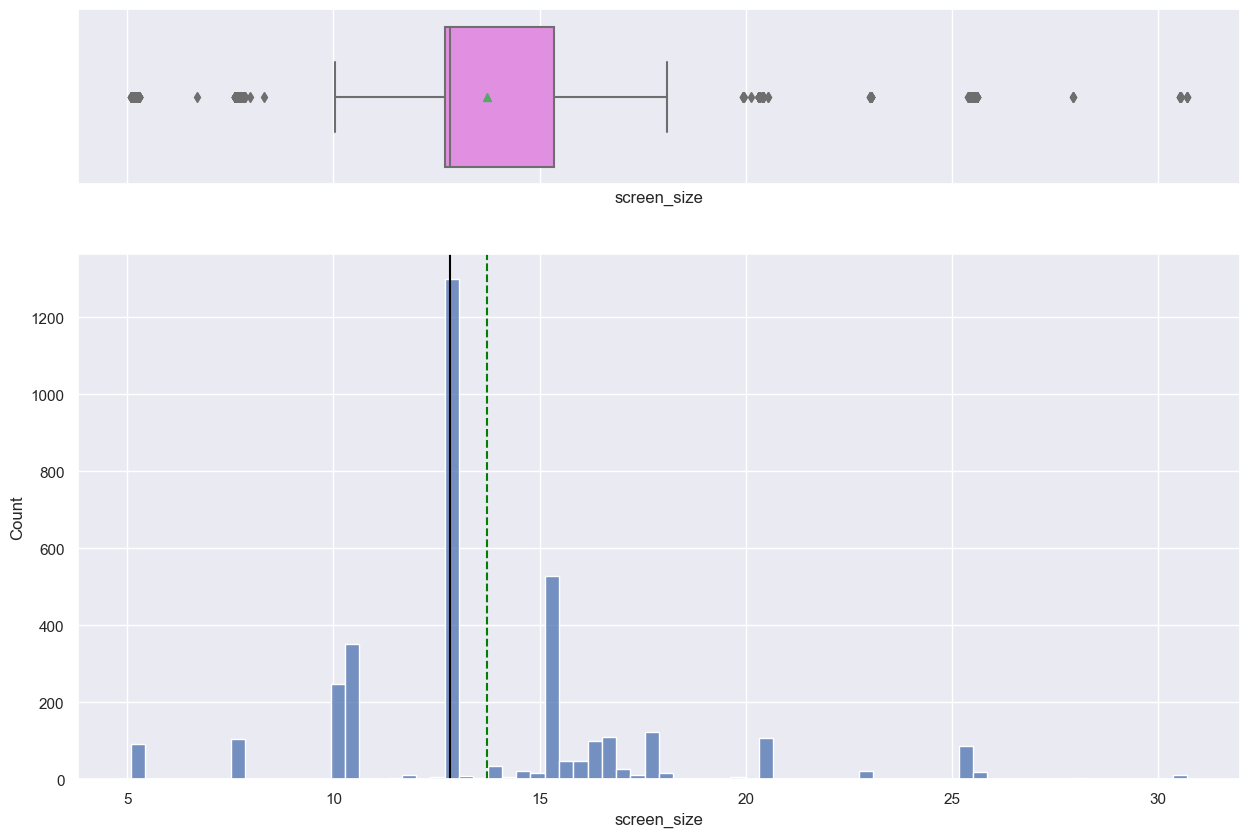

In [22]:
histogram_boxplot(df, 'screen_size')

In [23]:
df['main_camera_mp'].describe()

count    3275.000000
mean        9.460208
std         4.815461
min         0.080000
25%         5.000000
50%         8.000000
75%        13.000000
max        48.000000
Name: main_camera_mp, dtype: float64

C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


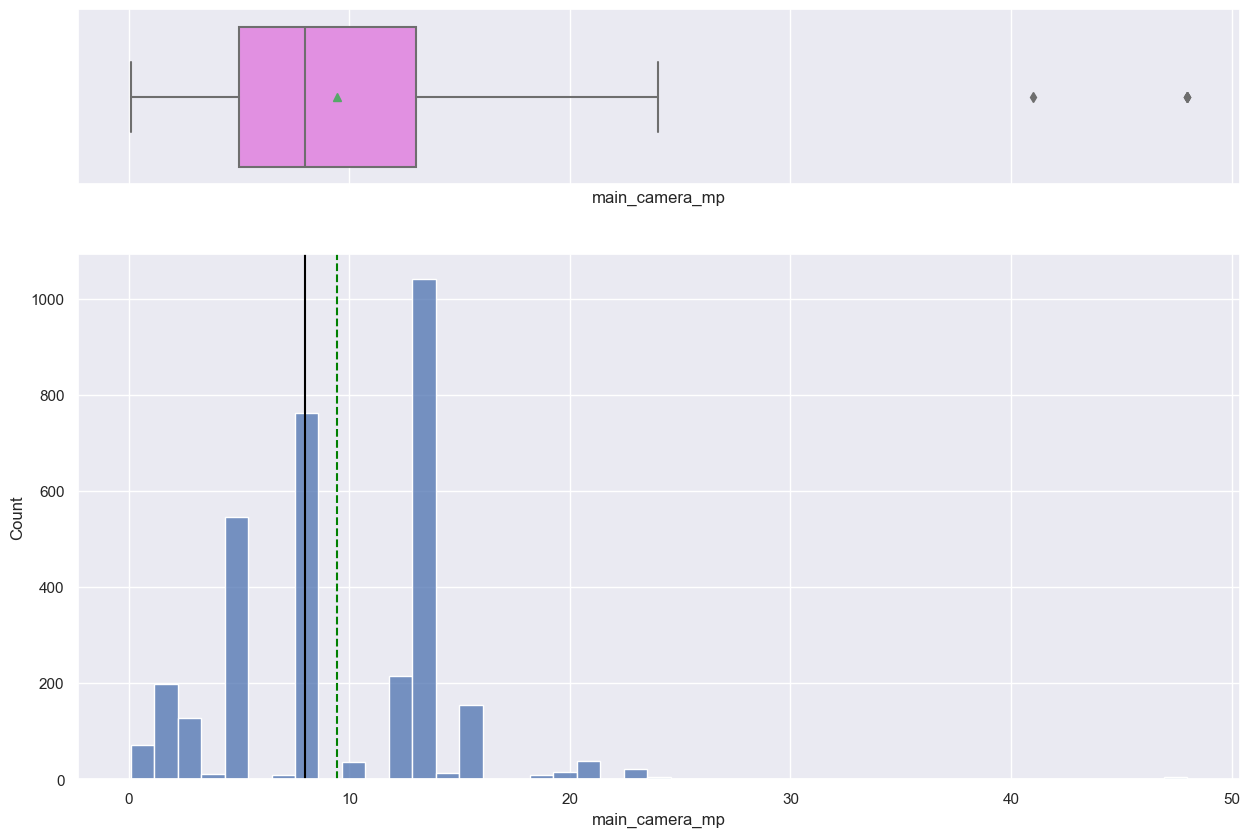

In [24]:
histogram_boxplot(df, 'main_camera_mp') 

In [25]:
df['selfie_camera_mp'].describe()

count    3452.000000
mean        6.554229
std         6.970372
min         0.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        32.000000
Name: selfie_camera_mp, dtype: float64

C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


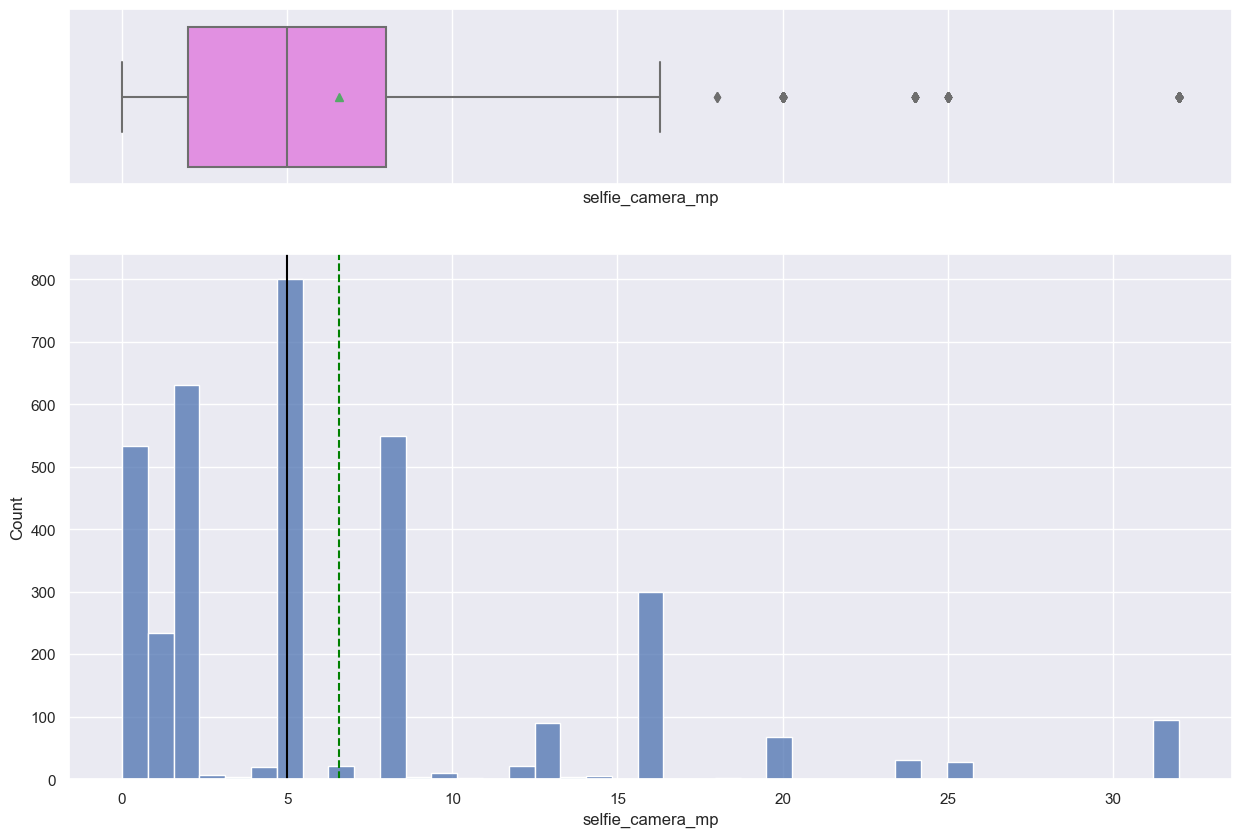

In [26]:
histogram_boxplot(df, 'selfie_camera_mp') 

In [27]:
df['int_memory'].describe()

count    3450.000000
mean       54.573099
std        84.972371
min         0.010000
25%        16.000000
50%        32.000000
75%        64.000000
max      1024.000000
Name: int_memory, dtype: float64

C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


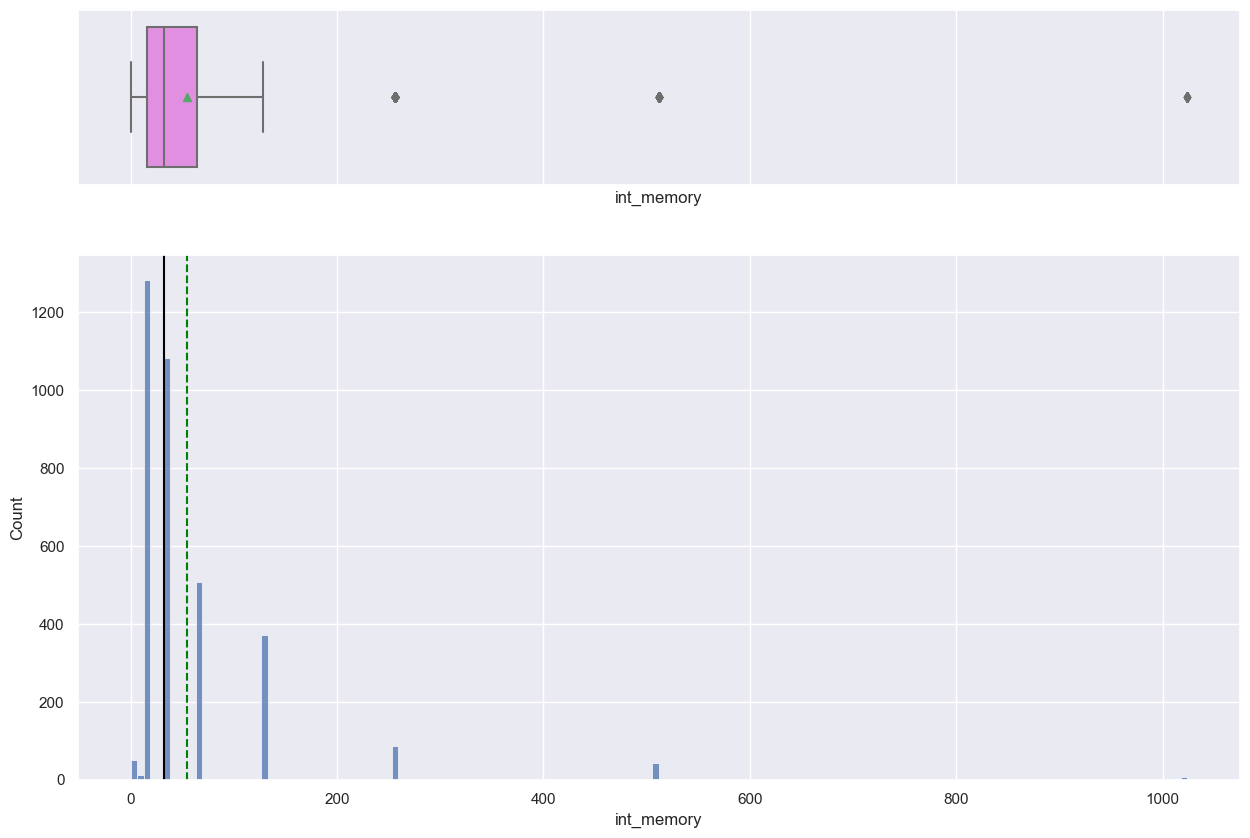

In [28]:
histogram_boxplot(df, 'int_memory') 

In [29]:
df['ram'].describe()

count    3450.000000
mean        4.036122
std         1.365105
min         0.020000
25%         4.000000
50%         4.000000
75%         4.000000
max        12.000000
Name: ram, dtype: float64

C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


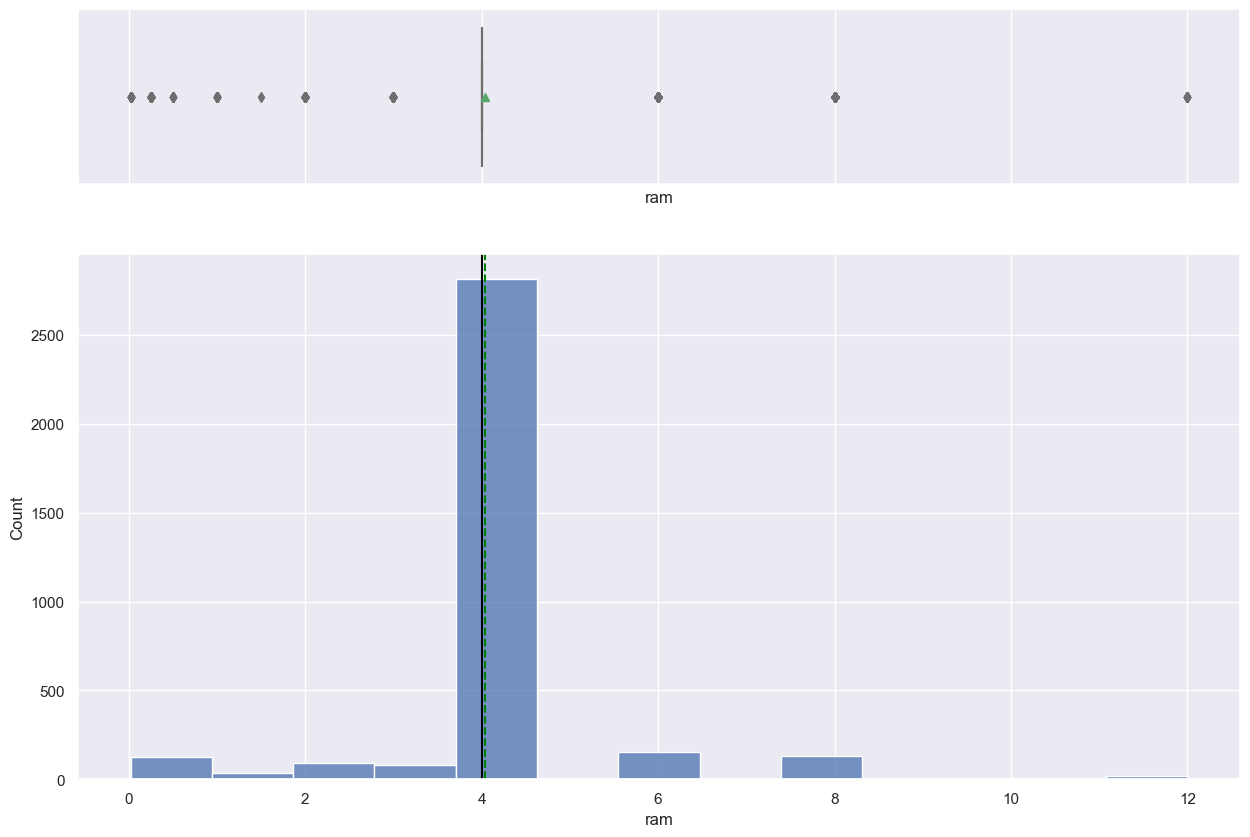

In [30]:
histogram_boxplot(df, 'ram') 

In [31]:
df['weight'].describe()

count    3447.000000
mean      182.751871
std        88.413228
min        69.000000
25%       142.000000
50%       160.000000
75%       185.000000
max       855.000000
Name: weight, dtype: float64

C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


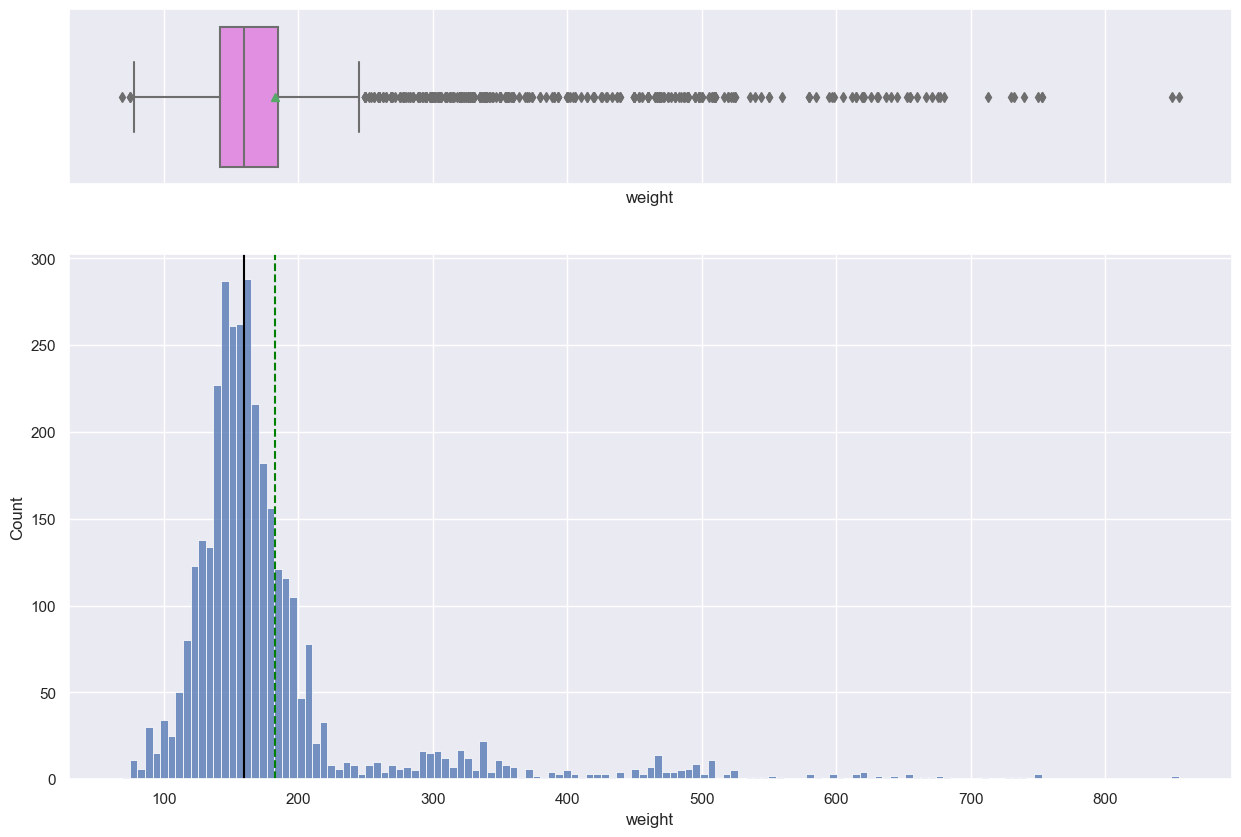

In [32]:
histogram_boxplot(df, 'weight') 

In [33]:
df['battery'].describe()

count    3448.000000
mean     3133.402697
std      1299.682844
min       500.000000
25%      2100.000000
50%      3000.000000
75%      4000.000000
max      9720.000000
Name: battery, dtype: float64

C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


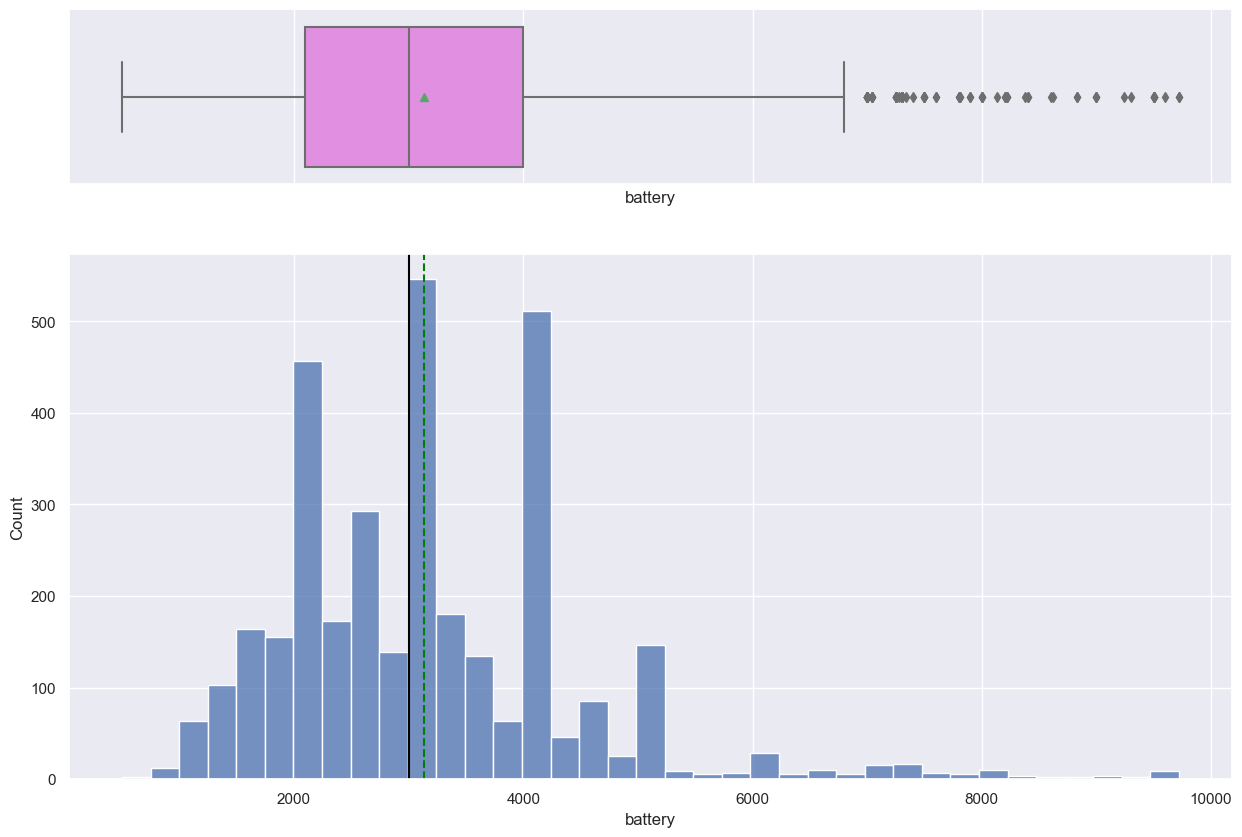

In [34]:
histogram_boxplot(df, 'battery')

In [35]:
df['days_used'].describe()

count    3454.000000
mean      674.869716
std       248.580166
min        91.000000
25%       533.500000
50%       690.500000
75%       868.750000
max      1094.000000
Name: days_used, dtype: float64

C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


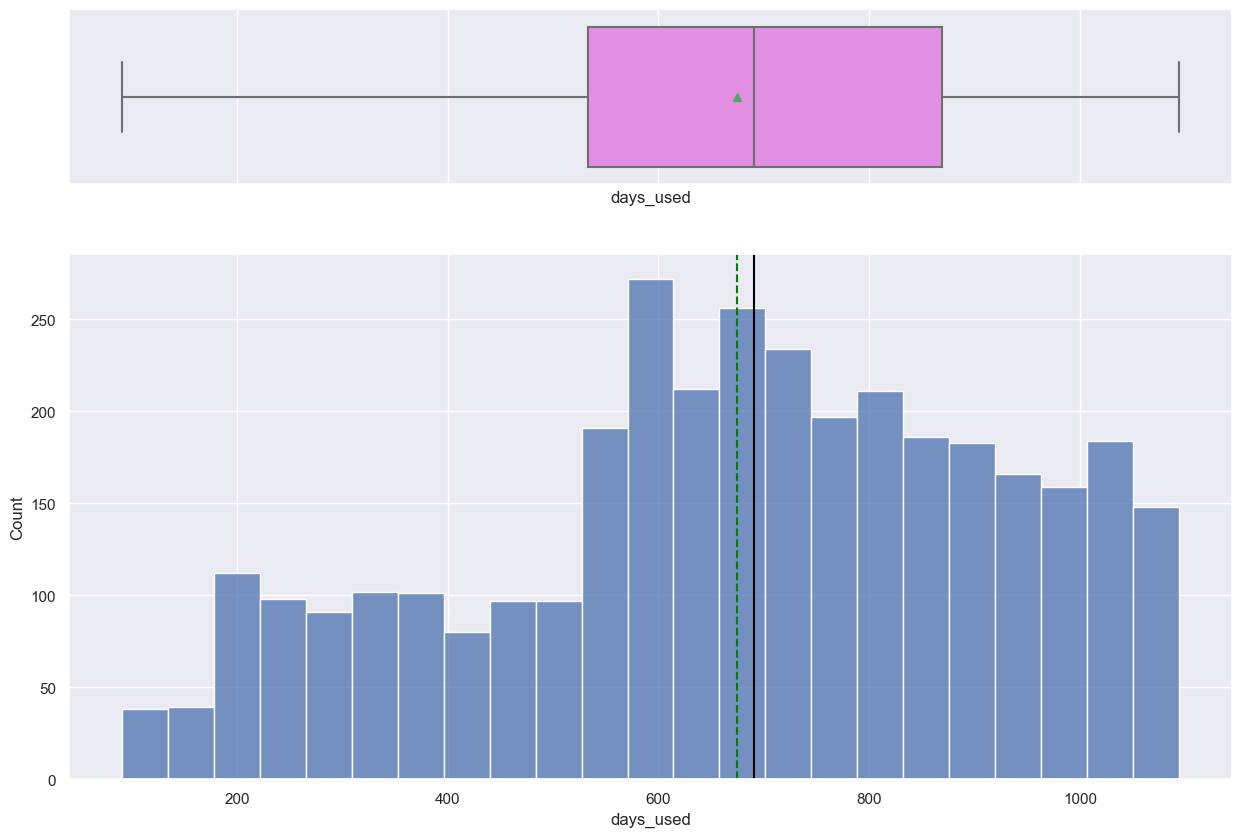

In [36]:
histogram_boxplot(df, 'days_used')

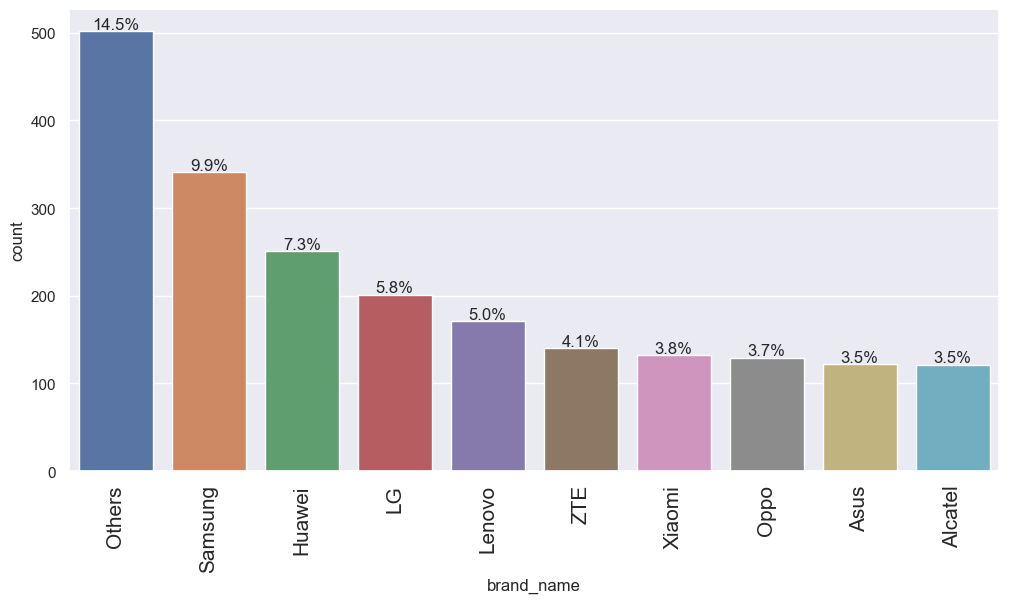

In [37]:
labeled_barplot(df, "brand_name", perc=True, n=10)

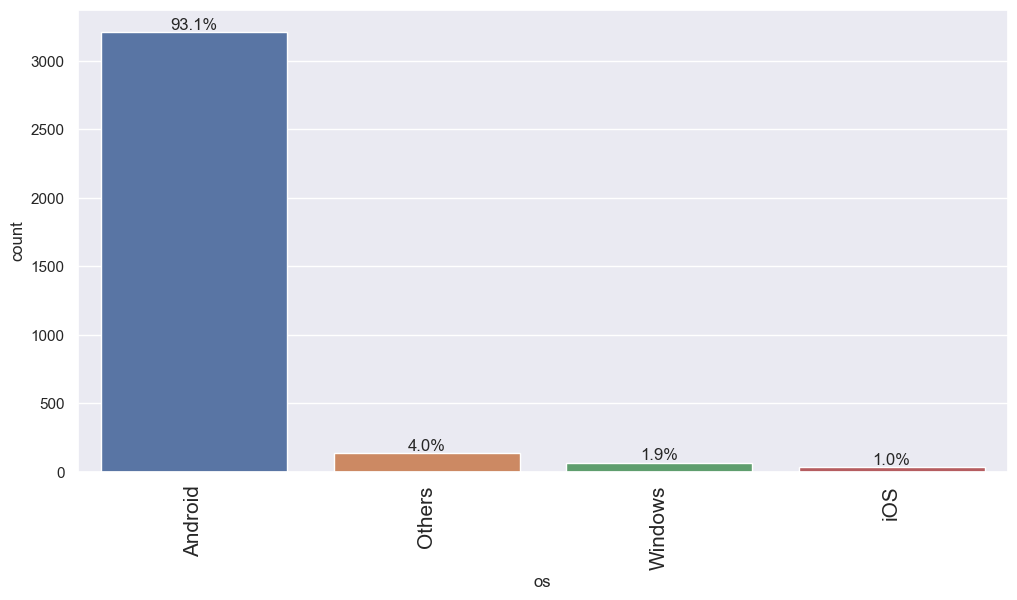

In [38]:
labeled_barplot(df, 'os',perc=True, n=10) 

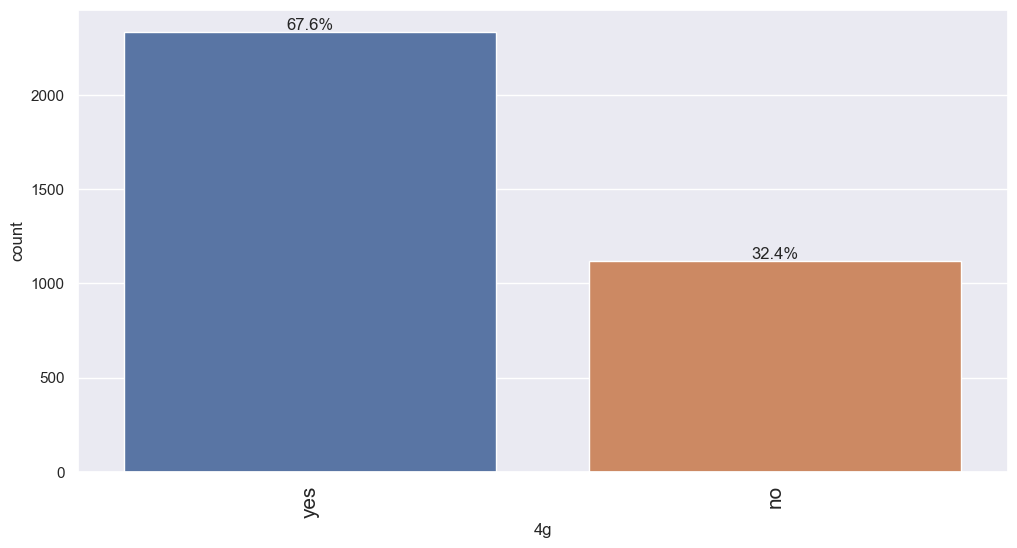

In [39]:
labeled_barplot(df, '4g', perc=True, n=10)

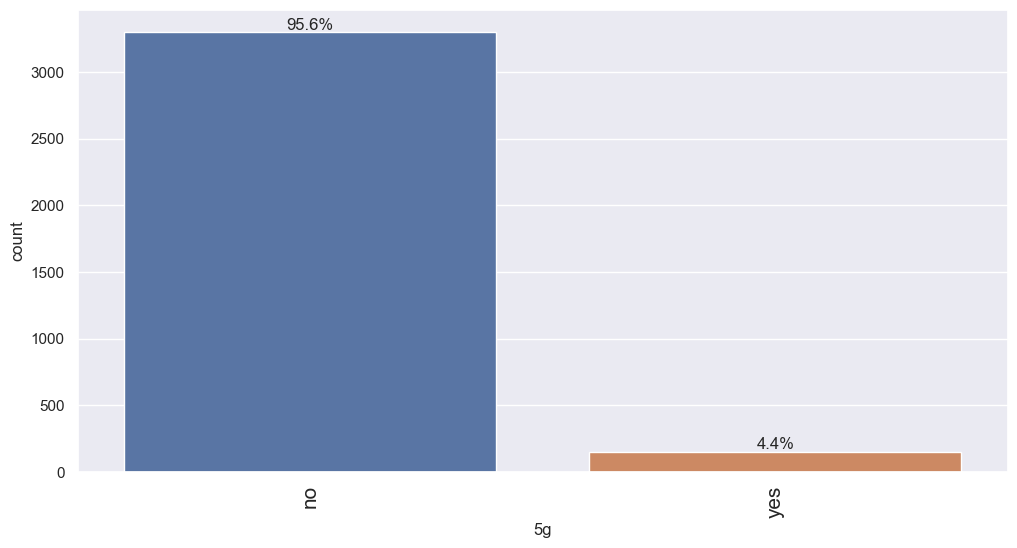

In [40]:
labeled_barplot(df, '5g', perc=True, n=10) 

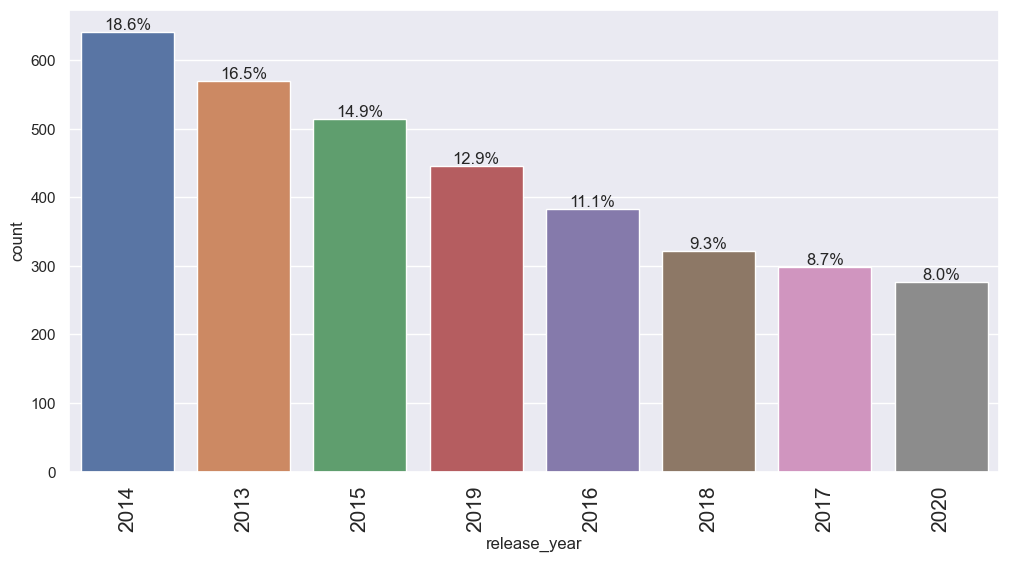

In [41]:
labeled_barplot(df, 'release_year', perc=True, n=10)

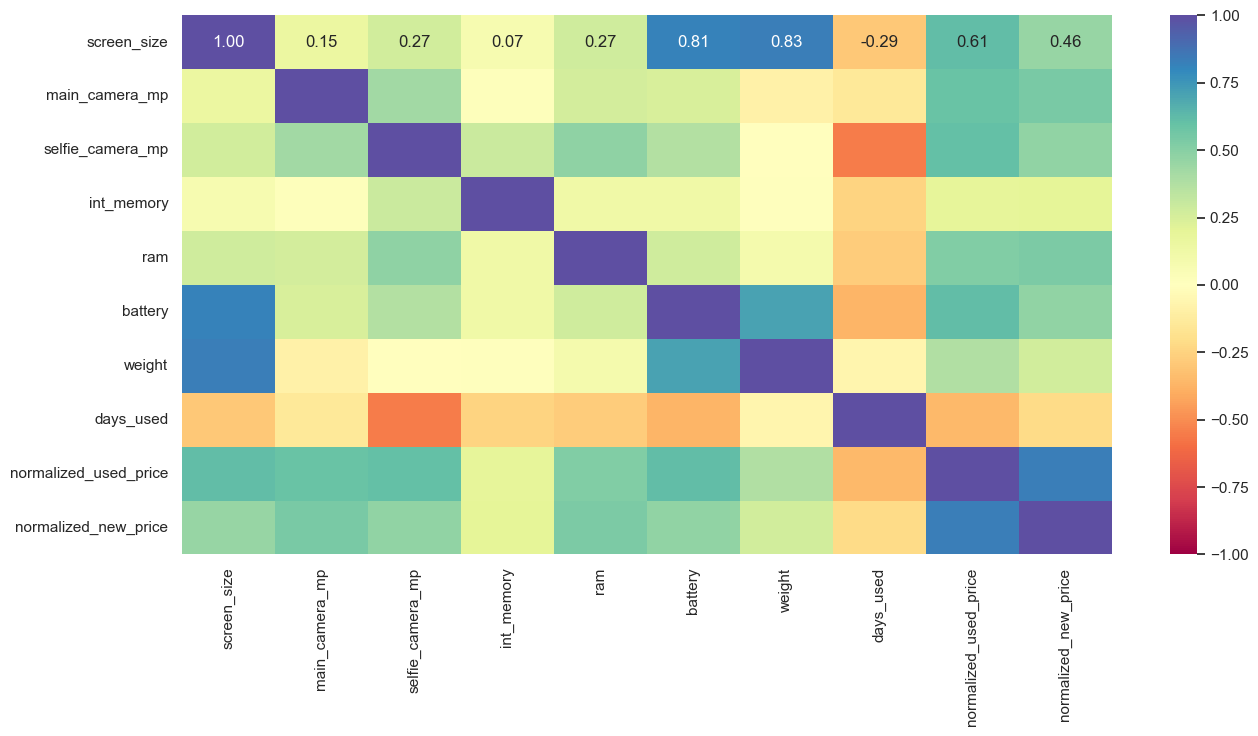

In [44]:
#Bivariate Analysis 
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

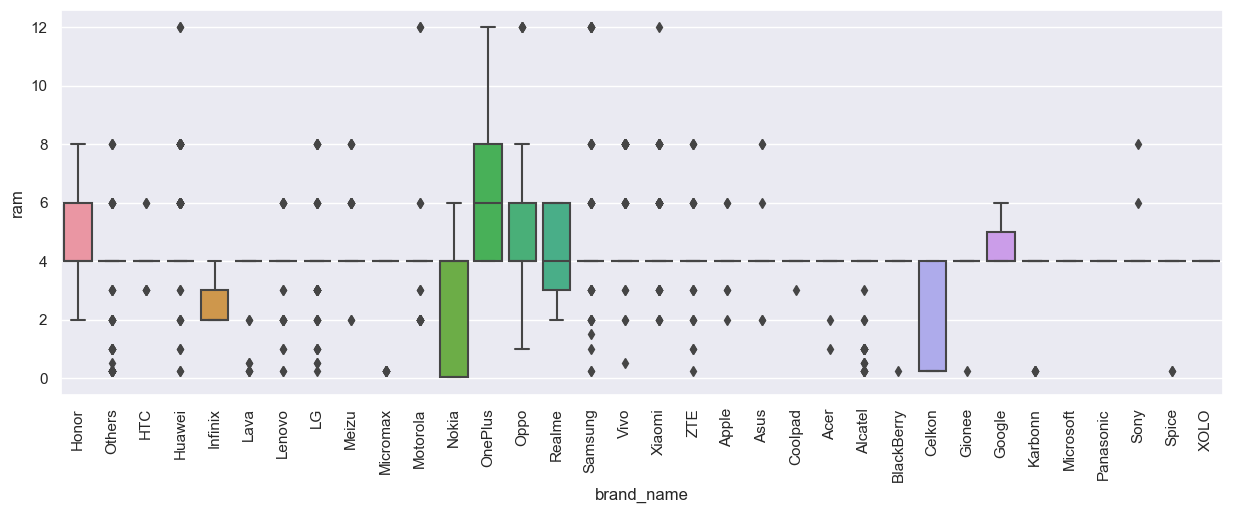

In [45]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

In [46]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

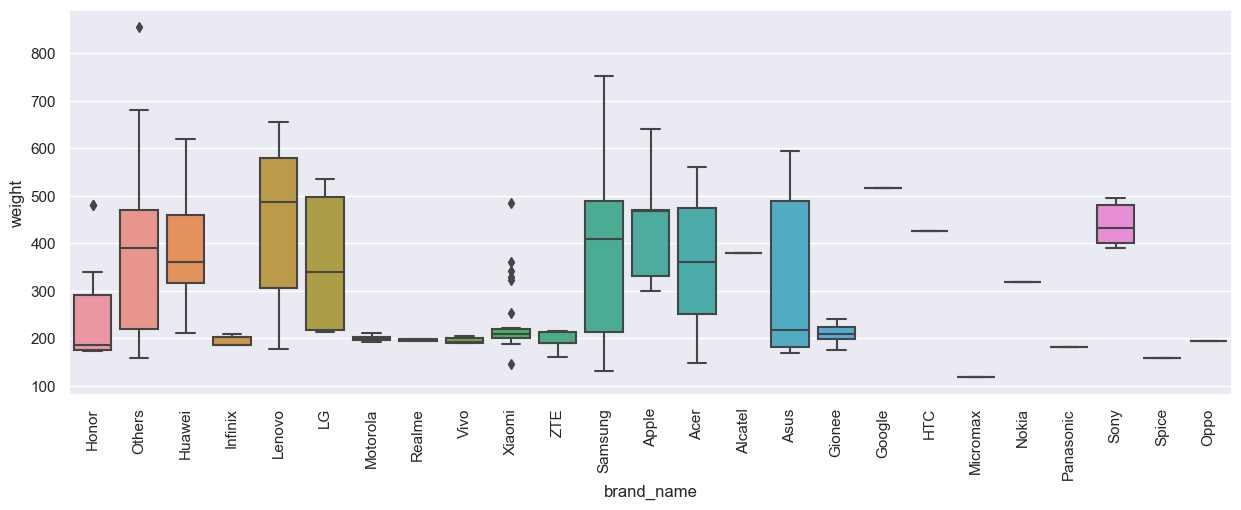

In [48]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_large_battery, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

In [49]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

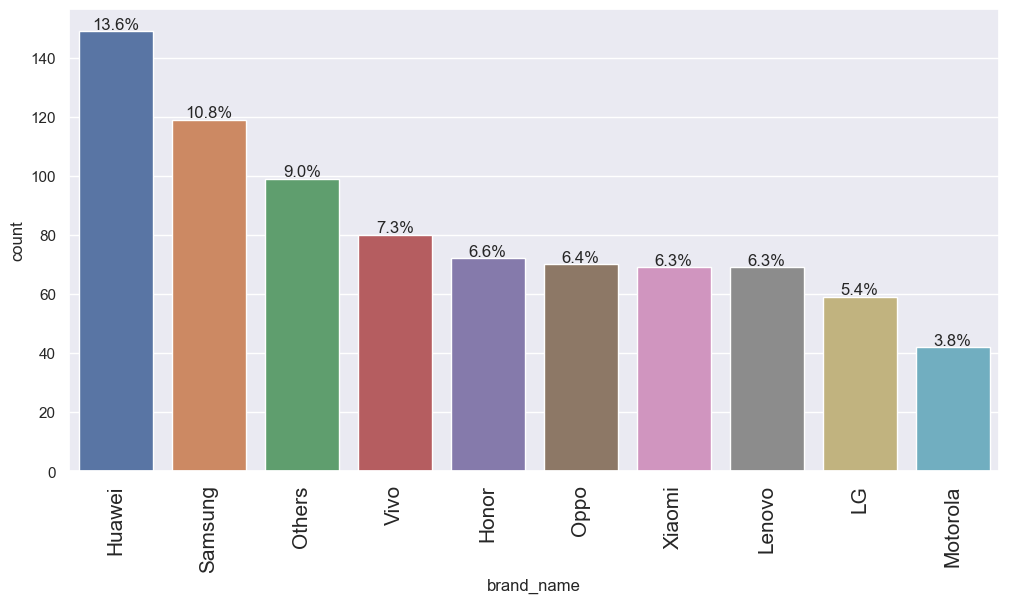

In [50]:
labeled_barplot(df_large_screen, 'brand_name', perc=True, n=10) 

In [51]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

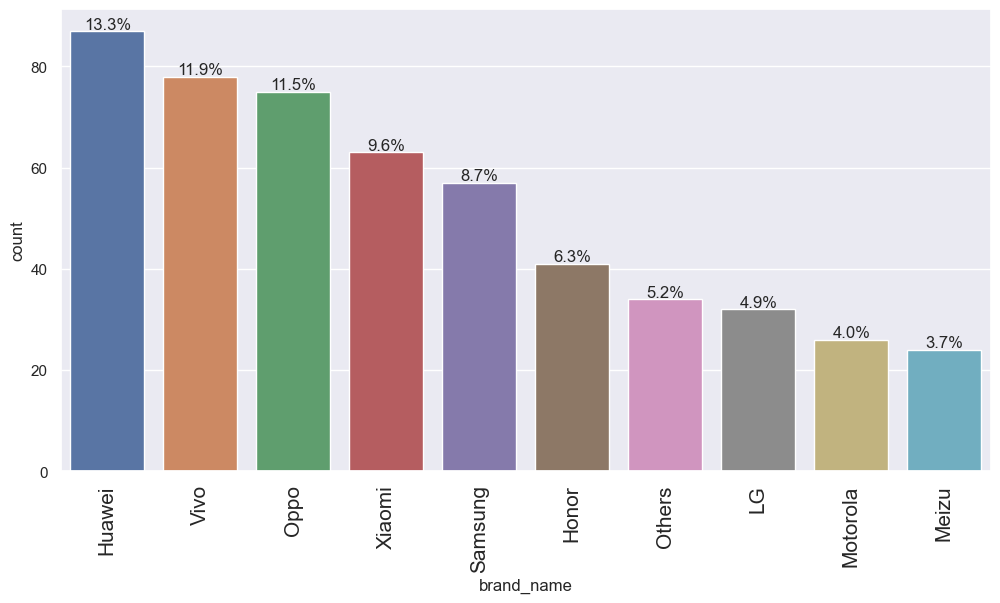

In [52]:
labeled_barplot(df_selfie_camera, 'brand_name', perc=True, n=10) 

In [53]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

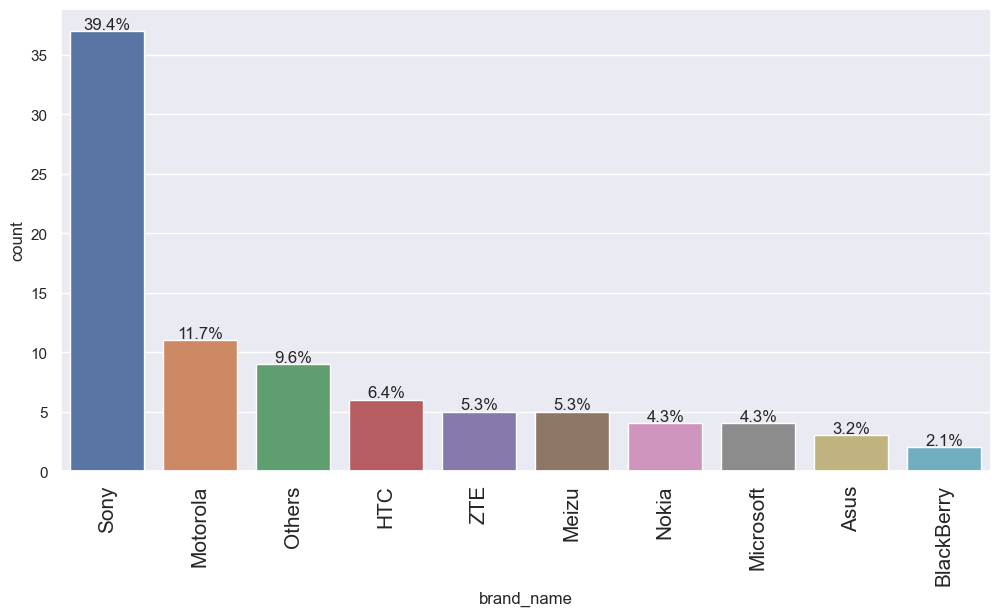

In [54]:
labeled_barplot(df_main_camera, 'brand_name', perc=True, n=10) 

C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


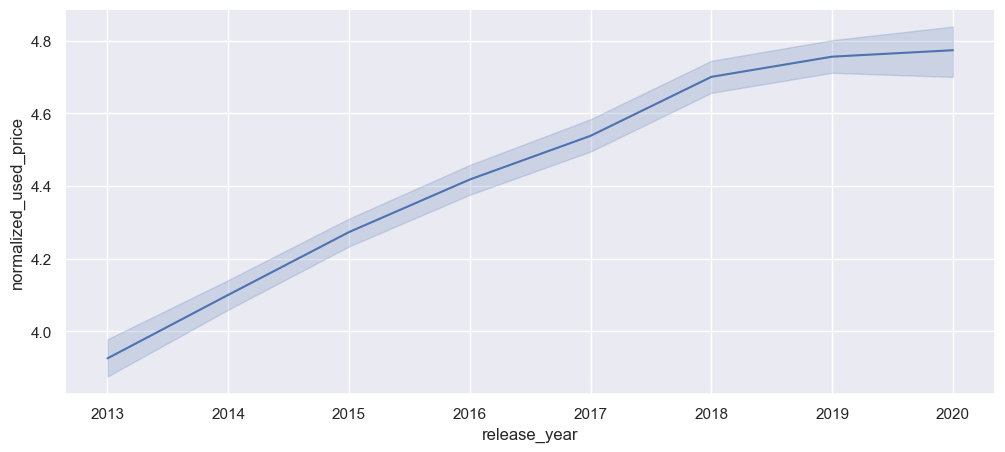

In [55]:
plt.figure(figsize=(12, 5))
sns.lineplot(df, x='release_year', y='normalized_used_price') 
plt.show()

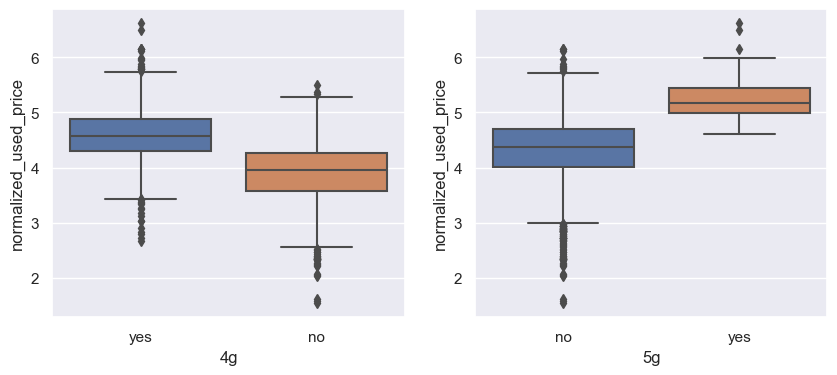

In [56]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

In [57]:
#Data Processing

# let's create a copy of the data
df1 = df.copy()

In [58]:
df1.isnull().sum() 

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [59]:
# creating a list of variables that contain missing values
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

 # imputing missing values in cols_impute with median by grouping the data on release year and brand name 
for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year','brand_name'])[col].transform("median")
    )  
# checking for missing values
df1.isnull().sum() 

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [60]:
# creating a list of variables that contain missing values
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

## imputing the missing values in cols_impute with median by grouping the data on brand name
for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    ) 

# checking for missing values
df1.isnull().sum()

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [61]:
## impute the data with median
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median) 

# checking for missing values
df1.isnull().sum()

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

In [62]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

count    3454.000000
mean        5.034742
std         2.298455
min         1.000000
25%         3.000000
50%         5.500000
75%         7.000000
max         8.000000
Name: years_since_release, dtype: float64

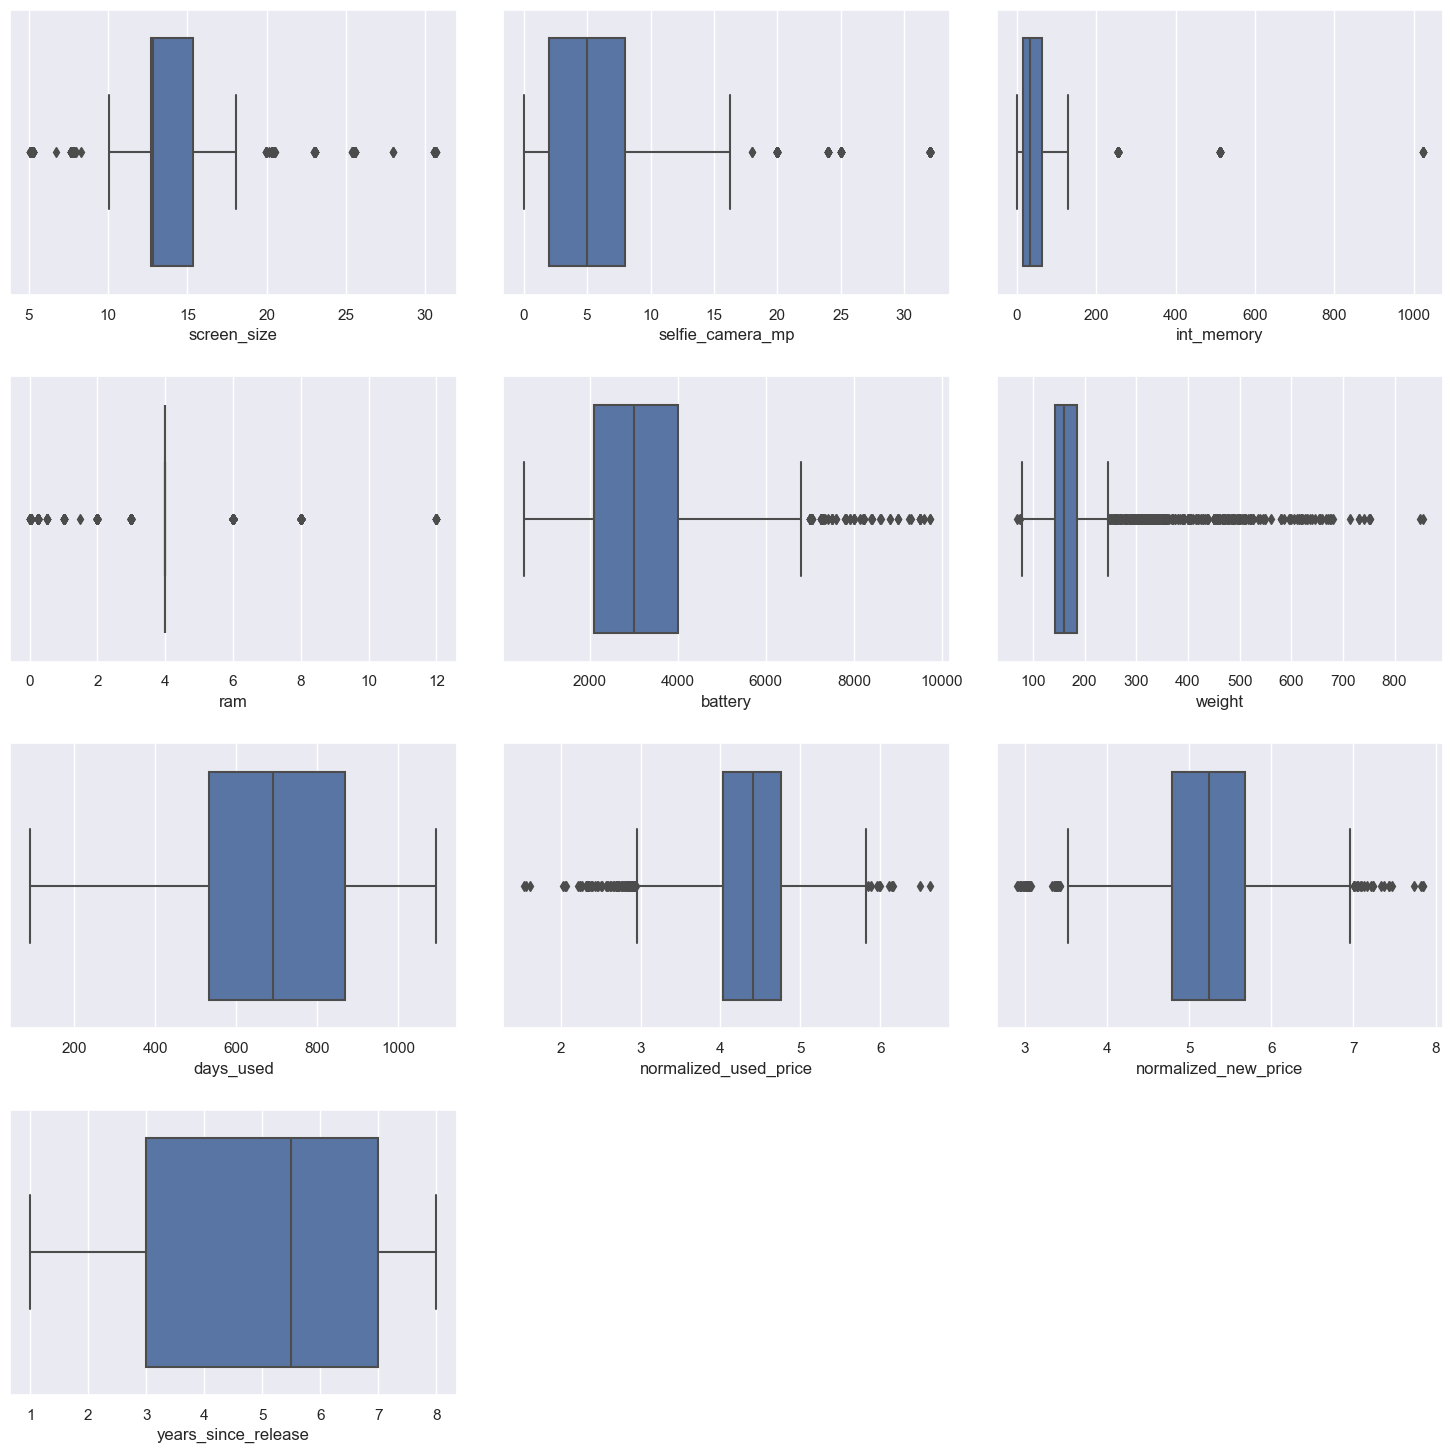

In [132]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

In [64]:
# define the dependent and independent variables
X = df1.drop(['normalized_used_price'], axis=1)
y = df1['normalized_used_price']

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g main_camera_mp  selfie_camera_mp  \
0      Honor  Android        14.50  yes   no           13.0               5.0   
1      Honor  Android        17.30  yes  yes           13.0              16.0   
2      Honor  Android        16.69  yes  yes           13.0               8.0   
3      Honor  Android        25.50  yes  yes           13.0               8.0   
4      Honor  Android        15.32  yes   no           13.0               8.0   

   int_memory  ram  battery  weight  days_used  normalized_new_price  \
0        64.0  3.0   3020.0   146.0        127              4.715100   
1       128.0  8.0   4300.0   213.0        325              5.519018   
2       128.0  8.0   4200.0   213.0        162              5.884631   
3        64.0  6.0   7250.0   480.0        345              5.630961   
4        64.0  3.0   5000.0   185.0        293              4.947837   

   years_since_release  
0                    1  
1                    1  
2    

In [65]:
# let's add the intercept to data
X = sm.add_constant(X)

In [66]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=['object','category']).columns.tolist(),
    drop_first=True,
) 

X = X.astype(float) 

X.head()

,const,screen_size,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release,...,main_camera_mp_20.1,main_camera_mp_12.6,main_camera_mp_16.3,main_camera_mp_22.6,main_camera_mp_19.0,main_camera_mp_21.5,main_camera_mp_21.2,main_camera_mp_8.1,main_camera_mp_1.2,main_camera_mp_22.5
0,1.0,14.50,5.0,64.0,3.0,3020.0,146.0,127.0,4.715100,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,17.30,16.0,128.0,8.0,4300.0,213.0,325.0,5.519018,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,16.69,8.0,128.0,8.0,4200.0,213.0,162.0,5.884631,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,25.50,8.0,64.0,6.0,7250.0,480.0,345.0,5.630961,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,15.32,8.0,64.0,3.0,5000.0,185.0,293.0,4.947837,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=1) 

In [68]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


In [69]:
#Model Building-Linear regression
# Create a fit OLS model
olsmodel1 = sm.OLS(y_train, x_train).fit() 
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.850
Model:                               OLS   Adj. R-squared:                  0.845
Method:                    Least Squares   F-statistic:                     159.2
Date:                   Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                           00:42:58   Log-Likelihood:                 163.90
No. Observations:                   2417   AIC:                            -159.8
Df Residuals:                       2333   BIC:                             326.6
Df Model:                             83                                         
Covariance Type:               nonrobust                                         
                                                                                                                                                                                    

In [71]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [72]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf


Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.226107,0.17736,0.849942,0.844202,4.247918


In [73]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.239404,0.185272,0.841094,0.82616,4.495925


In [74]:
#Checking Linear Regression Assumptions

#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [75]:
# check VIF on train data
checking_vif(x_train) 

C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,feature,VIF
0,const,293.713519
1,screen_size,8.072753
2,selfie_camera_mp,2.897750
3,int_memory,1.434004
4,ram,2.375248
...,...,...
84,main_camera_mp_21.5,1.033344
85,main_camera_mp_21.2,1.059116
86,main_camera_mp_8.1,1.137137
87,main_camera_mp_1.2,1.043345


In [76]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [91]:
# Create list of columns with high VIF
col_list = ['screen_size',
            'weight',
            'years_since_release',
            'brnad_name_Apple',
            'brand_name_Huawei',
            'brand_name_Others',
            'brand_name_Samsung',
            'os_iOS'] 

## check the effect on model performance after dropping specified columns from train data
res = treating_multicollinearity(x_train, y_train, col_list) 
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,os_iOS,0.844667,0.230093
1,brand_name_Others,0.844664,0.230096
2,brand_name_Huawei,0.844653,0.230104
3,brnad_name_Apple,0.844603,0.230141
4,brand_name_Samsung,0.844589,0.230151
5,years_since_release,0.843285,0.231115
6,screen_size,0.841532,0.232404
7,weight,0.840428,0.233212


In [113]:
# specify the column to drop
col_to_drop = 'os_iOS' 
# specify the train data from which to drop the column specified
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)] 
# specify the test data from which to drop the column specified
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)] 

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF after dropping  os_iOS


,feature,VIF
0,const,293.219202
1,screen_size,8.003282
2,selfie_camera_mp,2.889453
3,int_memory,1.433948
4,ram,2.362290
...,...,...
83,main_camera_mp_21.5,1.033341
84,main_camera_mp_21.2,1.059108
85,main_camera_mp_8.1,1.136492
86,main_camera_mp_1.2,1.043312


In [119]:
# specify the columns with high VIF
col_list = ['screen_size',
            'weight',
            'years_since_release',
            'brand_name_Huawei',
            'brand_name_Others',
            'brand_name_Samsung'] 

## check the effect on model performance after dropping specified columns from train data
res = treating_multicollinearity(x_train2, y_train, col_list) 
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,brand_name_Others,0.844728,0.230049
1,brand_name_Huawei,0.844717,0.230057
2,brand_name_Samsung,0.844654,0.230103
3,years_since_release,0.843351,0.231066
4,screen_size,0.841586,0.232365
5,weight,0.840475,0.233178


In [120]:
col_to_drop = 'brand_name_Others' 
x_train3 = x_train2.loc[:, ~x_train2.columns.str.startswith(col_to_drop)]
x_test3 = x_test2.loc[:, ~x_test2.columns.str.startswith(col_to_drop)] 

vif = checking_vif(x_train3)
print("VIF after dropping ", col_to_drop)
vif

C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF after dropping  brand_name_Others


,feature,VIF
0,const,212.850979
1,screen_size,7.952575
2,selfie_camera_mp,2.889414
3,int_memory,1.433523
4,ram,2.361061
...,...,...
82,main_camera_mp_21.5,1.033340
83,main_camera_mp_21.2,1.059108
84,main_camera_mp_8.1,1.136297
85,main_camera_mp_1.2,1.042979


In [121]:
# specify the columns with high VIF
col_list = ['screen_size',
            'weight',
            'years_since_release']

# check the effect on model performance after dropping specified columns from train data
res = treating_multicollinearity(x_train3, y_train, col_list) 
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,years_since_release,0.843415,0.231019
1,screen_size,0.841606,0.232350
2,weight,0.840541,0.233130


In [122]:
col_to_drop = 'years_since_release' 
x_train4 = x_train3.loc[:, ~x_train3.columns.str.startswith(col_to_drop)] 
x_test4 = x_test3.loc[:, ~x_test3.columns.str.startswith(col_to_drop)] 

vif = checking_vif(x_train4)
print("VIF after dropping ", col_to_drop)
vif


C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF after dropping  years_since_release


,feature,VIF
0,const,209.487161
1,screen_size,7.657489
2,selfie_camera_mp,2.609778
3,int_memory,1.414926
4,ram,2.359704
...,...,...
81,main_camera_mp_21.5,1.033174
82,main_camera_mp_21.2,1.056401
83,main_camera_mp_8.1,1.129631
84,main_camera_mp_1.2,1.042742


In [123]:
# specify the columns with high VIF
col_list = ['screen_size',
            'weight'] 

# check the effect on model performance after dropping specified columns from train data
res = treating_multicollinearity(x_train4, y_train, col_list) 
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,weight,0.839932,0.233574
1,screen_size,0.839280,0.234050


In [141]:
col_to_drop = 'weight' 
x_train5 = x_train4.loc[:, ~x_train4.columns.str.startswith(col_to_drop)] 
x_test5 = x_test4.loc[:, ~x_test4.columns.str.startswith(col_to_drop)] 

# Check VIF now
vif = checking_vif(x_train5)
print("VIF after dropping ", col_to_drop)
vif

C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1781: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


VIF after dropping  weight


,feature,VIF
0,const,181.453759
1,screen_size,3.720104
2,selfie_camera_mp,2.536853
3,int_memory,1.409823
4,ram,2.359107
...,...,...
80,main_camera_mp_21.5,1.033101
81,main_camera_mp_21.2,1.056177
82,main_camera_mp_8.1,1.128319
83,main_camera_mp_1.2,1.027043


In [147]:
# check for p-values on the right dataset
predictors = x_train5.copy()  
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'selfie_camera_mp', 'int_memory', 'ram', 'normalized_new_price', 'brand_name_Nokia', 'brand_name_Samsung', 'brand_name_Xiaomi', '4g_yes', 'main_camera_mp_8.0', 'main_camera_mp_5.0', 'main_camera_mp_3.15', 'main_camera_mp_2.0', 'main_camera_mp_16.0', 'main_camera_mp_0.3', 'main_camera_mp_48.0', 'main_camera_mp_1.3', 'main_camera_mp_23.0', 'main_camera_mp_4.0', 'main_camera_mp_10.0', 'main_camera_mp_6.7', 'main_camera_mp_16.3', 'main_camera_mp_8.1']


In [149]:
x_train3 = x_train5[selected_features] 
# specify the test data from which to select the specified columns
x_test3 = x_test5[selected_features]  

In [150]:
# fit OLS() on updated dataset (no multicollinearity and no insignificant predictors)
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     557.0
Date:                   Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                           19:36:39   Log-Likelihood:                 106.15
No. Observations:                   2417   AIC:                            -164.3
Df Residuals:                       2393   BIC:                            -25.33
Df Model:                             23                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [151]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train) 
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231574,0.181885,0.842597,0.841017,4.359256


In [152]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test) 
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241613,0.18775,0.838147,0.834309,4.560502


In [153]:
#TEST FOR LINEARITY AND INDEPENDENCE

# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.865778,0.221709
1525,4.448399,4.590106,-0.141707
1128,4.315353,4.288397,0.026956
3003,4.282068,4.268344,0.013724
2907,4.456438,4.461090,-0.004652


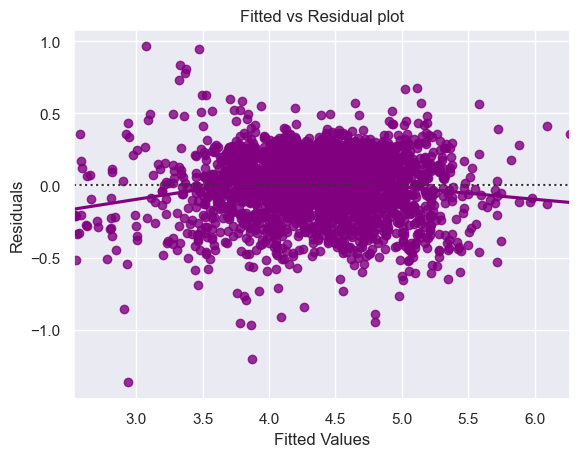

In [155]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

C:\Users\GNANASEKARAN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


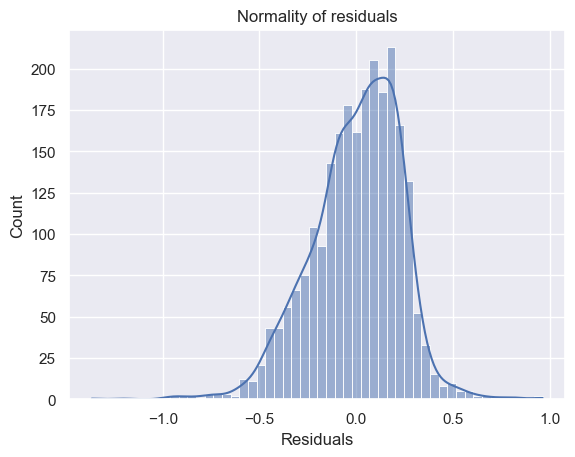

In [156]:
# plot the distribution of residuals
sns.histplot(data=df_pred,  x="Residuals", kde=True) 
plt.title("Normality of residuals")
plt.show()

((array([-3.44385758, -3.19630236, -3.05919064, ...,  3.05919064,
          3.19630236,  3.44385758]),
  array([-1.36673332, -1.20219584, -0.96522884, ...,  0.83379501,
          0.94644703,  0.96416483])),
 (0.22884251340431236, 9.624033565966371e-14, 0.986943890772691))

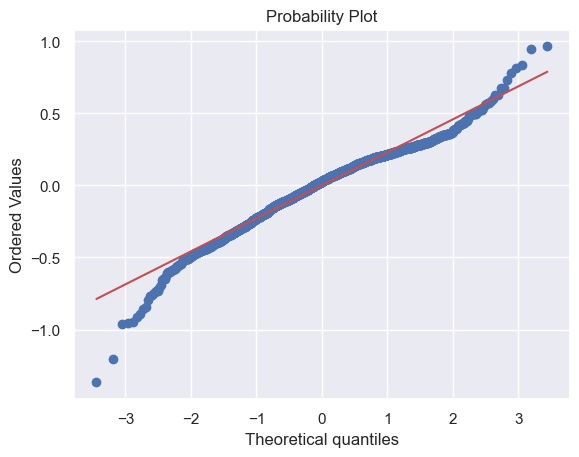

In [157]:
import pylab
import scipy.stats as stats

# check Q-Q plot
plt.show()
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab) 

In [158]:
 # apply the Shapiro-Wilks test
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9748184084892273, pvalue=3.1171865175534697e-20)

In [159]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

# apply the Goldfeldquandt test on the right train data
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3) 
lzip(name, test)

[('F statistic', 1.0643431899824787), ('p-value', 0.141633165194831)]

In [160]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [161]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit() 
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.843
Model:                               OLS   Adj. R-squared:                  0.841
Method:                    Least Squares   F-statistic:                     557.0
Date:                   Sun, 04 Aug 2024   Prob (F-statistic):               0.00
Time:                           19:50:29   Log-Likelihood:                 106.15
No. Observations:                   2417   AIC:                            -164.3
Df Residuals:                       2393   BIC:                            -25.33
Df Model:                             23                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [162]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(olsmodel_final, x_train_final, y_train) 
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.231574,0.181885,0.842597,0.841017,4.359256


In [163]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(olsmodel_final, x_test_final, y_test) 
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241613,0.18775,0.838147,0.834309,4.560502
